In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from transformers import BertForTokenClassification, BertTokenizer, AdamW
from torch.utils.data import DataLoader, TensorDataset

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("anferico/bert-for-patents")

In [ ]:
# Define the number of entity labels
num_labels = 5 # Replace with the actual number of entity labels
input_length = 200
# Create the BERT model for token classification
model = BertForTokenClassification.from_pretrained("anferico/bert-for-patents", num_labels=num_labels)
# Define the loss function
loss_fn = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at anferico/bert-for-patents and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
mapping = [
   {
      "name":"0",
      "id":0
   },
   {
      "name":"Invention",
      "id":1
   },
   {
      "name":"MainComponent",
      "id":2
   },
   {
      "name": "SubComponent",
      "id": 3
   },
   {
      "name": "ApplicationDomain",
      "id": 4
   }
]
def convert_entitiy_label_encode(entitiy_label):
  encoded_labels = [0] * len(entitiy_label)
  for idx, entity in enumerate(entitiy_label):
    for m in mapping:
      if entity == m['name']:
        encoded_labels[idx] = m['id']
  return encoded_labels


In [ ]:
def extract_lables_tokens_to_bert_format(dataset):
    bert_dataset = []
    for idx,example in enumerate(dataset):
      example = json.loads(example)
      tokens = example["tokens"]
      spans = example["spans"]
      tokens = [token['text'] for token in tokens]

      # Tokenize the text
      #tokens = tokenizer.tokenize(text)

      # Initialize entity labels for each token
      entity_labels = ["O"] * input_length

      for span in spans:
        start = span["token_start"]
        end = span["token_end"]
        label = span["label"]

        # Mark the tokens corresponding to the entity with the entity label
        for i in range(start, end + 1):
          entity_labels[i] = label

      # Convert tokens and entity labels to input features
      #input_ids = tokenizer.convert_tokens_to_ids(tokens)
      #attention_mask = [1] * len(input_ids)
      entity_labels_ids = convert_entitiy_label_encode(entity_labels)
      #entity_labels_ids.insert(0,0)
      #entity_labels_ids.append(0)
      #print(entity_labels_ids)

      # Create a dictionary containing the input features
      features = {
          "labels": entity_labels_ids,
          "tokens": tokens
      }

      bert_dataset.append(features)

    return bert_dataset



In [ ]:
import pandas as pd
file_path = '/content/claims_annotated_all.jsonl'

import json

with open('/content/claims_annotated_all.jsonl', 'r') as json_file:
    json_list = list(json_file)


# Example usage
dataset = json_list

# Convert the dataset to BERT format
bert_formatted_dataset = extract_lables_tokens_to_bert_format(dataset)

# Print the first example in the BERT format
print(bert_formatted_dataset[-1])


{'labels': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tokens': ['We', 'claim', ':', ' \n     \n       ', '1', '.', 'A', 'sulfur', 'containing', 'catalyst', 'for', 'the', 'electroreduction', 'of', 'oxygen', 'obtainable', 'by', 'sparging', 'a', 'solution', 'of', 'rhodium', 'salt', 'with', 'hydrogen', 'sulfide', ',', 'recovering', 'and', 'drying', 'the', 'resulting', 'product', ',', 'grinding', 'the', 'resulting', 'product', ',', 'and', 's

In [ ]:
# Convert the dataset to input features
def convert_dataset_to_features(dataset):
    input_ids = []
    attention_masks = []
    labels = []

    for example in dataset:
        tokens = example["tokens"]
        labels_ids = example["labels"]
        #labels_ids.append(0)
        #labels_ids.insert(0,0)

        # Tokenize the text
        #input_ids = tokenizer.convert_tokens_to_ids(tokens)
        inputs = tokenizer.encode_plus(
            text = tokens,
            is_split_into_words = True,
            add_special_tokens=False,
            truncation=True,
            padding="max_length",
            max_length=input_length,
            return_tensors="pt"
        )

        input_ids.append(inputs["input_ids"][0])
        attention_masks.append(inputs["attention_mask"][0])
        labels.append(labels_ids)
    print(f"length of input ids: {len(input_ids[0])}, lenth of labels: {len(labels[0])}")

    input_ids = torch.stack(input_ids, dim=0)
    attention_masks = torch.stack(attention_masks, dim=0)
    labels = torch.tensor(labels)

    return TensorDataset(input_ids, attention_masks, labels)



In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

num_examples = len(bert_formatted_dataset)
num_train_examples = int(num_examples * train_ratio)
num_val_examples = int(num_examples * val_ratio)

train_dataset = bert_formatted_dataset[:num_train_examples]
val_dataset = bert_formatted_dataset[num_train_examples:num_train_examples+num_val_examples]
test_dataset = bert_formatted_dataset[num_train_examples+num_val_examples:]


train_dataset = convert_dataset_to_features(train_dataset)
val_dataset = convert_dataset_to_features(val_dataset)
test_dataset = convert_dataset_to_features(test_dataset)


# Create the train dataloader
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size, shuffle=True)

length of input ids: 200, lenth of labels: 200
length of input ids: 200, lenth of labels: 200
length of input ids: 200, lenth of labels: 200


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 250  # Replace with the desired number of training epochs

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
no_improvement_counter = 0

# Lists to store epoch and loss values
epoch_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)

    # Validation
    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_dataloader)

    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_val_loss:.4f}")

    epoch_list.append(epoch + 1)
    train_loss_list.append(average_train_loss)
    val_loss_list.append(average_val_loss)

    # Check for early stopping
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        no_improvement_counter = 0
    else:
        no_improvement_counter += 1

    if no_improvement_counter >= patience:
        print("Early stopping! Validation loss has not improved for", patience, "epochs.")
        break


Epoch 1/250 - Training Loss: 0.3027 - Validation Loss: 0.2002
Epoch 2/250 - Training Loss: 0.2049 - Validation Loss: 0.1913
Epoch 3/250 - Training Loss: 0.1840 - Validation Loss: 0.1832
Epoch 4/250 - Training Loss: 0.1689 - Validation Loss: 0.1757
Epoch 5/250 - Training Loss: 0.1566 - Validation Loss: 0.1753
Epoch 6/250 - Training Loss: 0.1446 - Validation Loss: 0.1750
Early stopping! Validation loss has not improved for 2 epochs.


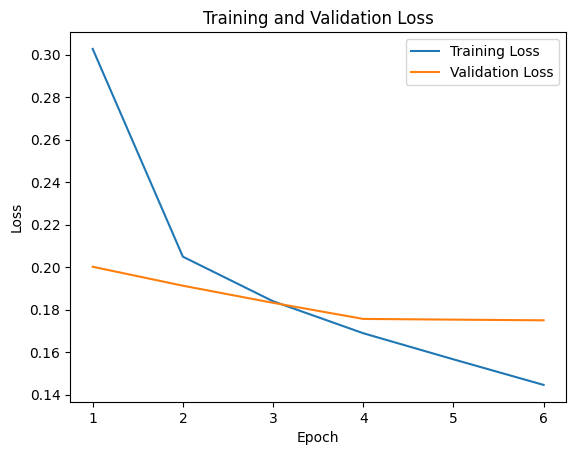

In [ ]:
import matplotlib.pyplot as plt
# Plotting epoch vs. loss
plt.plot(epoch_list, train_loss_list, label='Training Loss')
plt.plot(epoch_list, val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# Function to evaluate the model on the test set
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=2)

            # Flatten and remove padding tokens
            predicted_labels_flat = predicted_labels.view(-1)[attention_mask.view(-1) == 1]
            labels_flat = labels.view(-1)[attention_mask.view(-1) == 1]

            all_preds.extend(predicted_labels_flat.tolist())
            all_labels.extend(labels_flat.tolist())

    return all_preds, all_labels

# Evaluate the model on the test set
predicted_labels_train, true_labels_train = evaluate_model(model, train_dataloader)
predicted_labels_test, true_labels_test = evaluate_model(model, test_dataloader)
predicted_labels_validation, true_labels_validation = evaluate_model(model, val_dataloader)

# Calculate accuracy, precision, and recall
accuracy_train = accuracy_score(true_labels_train, predicted_labels_train)
precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(true_labels_train, predicted_labels_train, average='weighted')
accuracy_test = accuracy_score(true_labels_test, predicted_labels_test)
precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(true_labels_test, predicted_labels_test, average='weighted')
accuracy_val = accuracy_score(true_labels_validation, predicted_labels_validation)
precision_val, recall_val, fscore_val, _ = precision_recall_fscore_support(true_labels_validation, predicted_labels_validation, average='weighted')

print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {fscore_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {fscore_test:.4f}")
print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Validation Precision: {precision_val:.4f}")
print(f"Validation Recall: {recall_val:.4f}")
print(f"Validation F1 Score: {fscore_val:.4f}")


Training Accuracy: 0.8592
Training Precision: 0.8528
Training Recall: 0.8592
Training F1 Score: 0.8516
Testing Accuracy: 0.7976
Testing Precision: 0.7785
Testing Recall: 0.7976
Testing F1 Score: 0.7814
Validation Accuracy: 0.8105
Validation Precision: 0.7948
Validation Recall: 0.8105
Validation F1 Score: 0.7974


In [ ]:
id_to_name_mapping = {label["id"]: label["name"] for label in mapping}

In [ ]:
import torch
import torch.nn.functional as F

# ... (Assuming you have already defined and trained your model and have the test_dataloader) ...

# Function to evaluate the model on the test set
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=2)

            # Flatten and remove padding tokens
            predicted_labels_flat = predicted_labels.view(-1)[attention_mask.view(-1) == 1]
            labels_flat = labels.view(-1)[attention_mask.view(-1) == 1]

            all_preds.extend(predicted_labels_flat.tolist())
            all_labels.extend(labels_flat.tolist())

    return all_preds, all_labels

# Evaluate the model on the test set
predicted_labels, true_labels = evaluate_model(model, test_dataloader)

# Calculate accuracy for each label
label_accuracy = [0] * num_labels
label_counts = [0] * num_labels

for predicted_label, true_label in zip(predicted_labels, true_labels):
    label_counts[true_label] += 1
    if predicted_label == true_label:
        label_accuracy[true_label] += 1

label_accuracy_percentage = [acc / count * 100 if count > 0 else 0 for acc, count in zip(label_accuracy, label_counts)]
label_precision, label_recall, label_f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, labels=list(id_to_name_mapping.keys()), average=None)

# Print accuracy for each label
for label_id, accuracy_percentage in enumerate(label_accuracy_percentage):
    label_name = model.config.id2label[label_id]
    label_precision_percentage = label_precision[label_id] * 100
    label_recall_percentage = label_recall[label_id] * 100
    label_f1_percentage = label_f1[label_id] * 100
    print(f"Label '{id_to_name_mapping[label_id]}':")
    print(f"  Precision: {label_precision_percentage:.2f}%")
    print(f"  Recall: {label_recall_percentage:.2f}%")
    print(f"  F1-score: {label_f1_percentage:.2f}%")
    print(f"  Accuracy : {accuracy_percentage:.2f}%")


Label '0':
  Precision: 83.50%
  Recall: 92.44%
  F1-score: 87.74%
  Accuracy : 92.44%
Label 'Invention':
  Precision: 90.61%
  Recall: 82.60%
  F1-score: 86.42%
  Accuracy : 82.60%
Label 'MainComponent':
  Precision: 58.68%
  Recall: 45.72%
  F1-score: 51.40%
  Accuracy : 45.72%
Label 'SubComponent':
  Precision: 56.18%
  Recall: 30.16%
  F1-score: 39.25%
  Accuracy : 30.16%
Label 'ApplicationDomain':
  Precision: 55.19%
  Recall: 52.47%
  F1-score: 53.79%
  Accuracy : 52.47%


In [ ]:
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Save the trained model to Google Drive
output_dir = "/content/drive/My Drive/saved_model/mode.bin"
model.save_pretrained(output_dir)
#tokenizer.save_pretrained(output_dir)